In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)
print(start)
print(end)

2018-01-01 00:00:00
2024-07-20 00:00:00


In [66]:
stock = ['TSLA']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newdata= data.reset_index()
newdata.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
newdata.to_csv('TSLA.csv')

In [ ]:
path = '/content/TSLA.csv'
tsla_data = pd.read_csv(path)
tsla_data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,TSLA,239.20,249.44,236.8300,247.79,87403903
1,1,2024-07-18,TSLA,249.23,257.14,247.2000,251.09,110869037
2,2,2024-07-17,TSLA,248.50,258.47,246.1820,252.73,115584810
3,3,2024-07-16,TSLA,256.56,258.62,245.8001,255.31,126332470
4,4,2024-07-15,TSLA,252.64,265.60,251.7300,255.97,146912920


In [ ]:
# tsla_data.set_index('Date', inplace=True)
tsla_data.head()
tsla_data.sort_index(inplace=True)

<Axes: title={'center': 'Tesla stock price'}, xlabel='Date', ylabel='Price'>

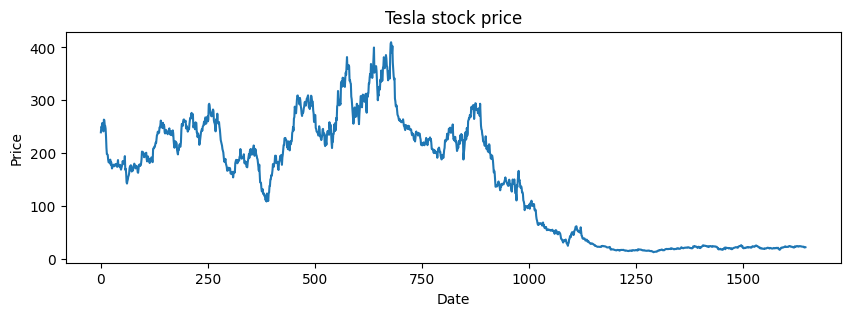

In [ ]:
close_price = tsla_data['Close']

close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'Tesla stock price',figsize=(10,3))


In [ ]:
close_price = tsla_data['Close']
vol_data = tsla_data['Volume']
high_price = tsla_data['High']
low_price = tsla_data['Low']
open_price = tsla_data['Open']

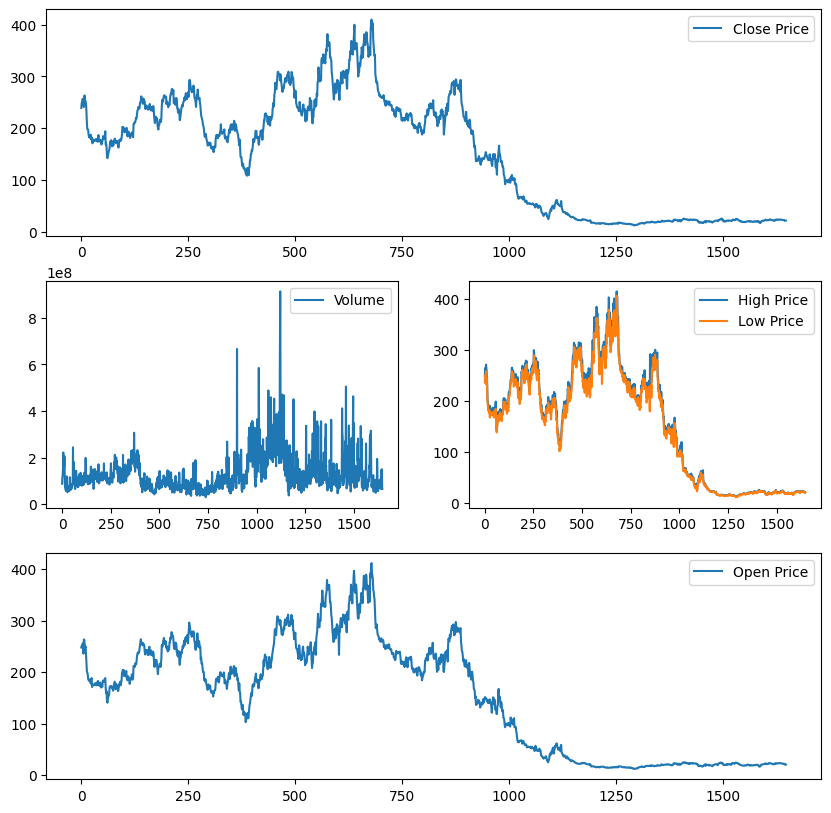

In [ ]:
plt.figure(figsize=(10,10))

# Subplot for Close Price
plt.subplot(3,1,1)
plt.plot(close_price, label='Close Price')
plt.legend()

# Subplot for Volume
plt.subplot(3,2,3)
plt.plot(vol_data, label='Volume')
plt.legend()

# Subplot for High/Low Price
plt.subplot(3,2,4)
plt.plot(high_price, label='High Price')
plt.plot(low_price, label='Low Price')
plt.legend()

# Subplot for Open Price
plt.subplot(3,1,3)
plt.plot(open_price, label='Open Price')
plt.legend()

plt.show()


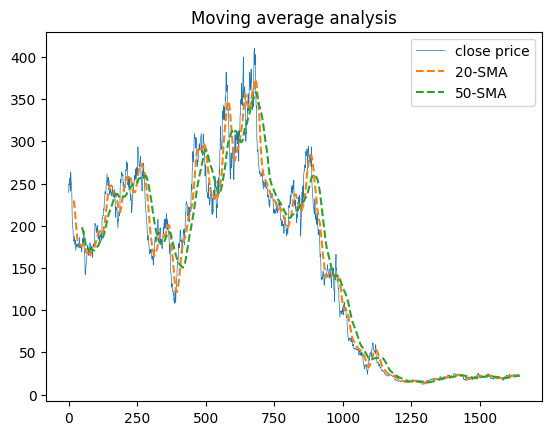

In [ ]:
# calulate the moving average
tsla_data['SMA_20'] = tsla_data['Close'].rolling(20).mean()
tsla_data['SMA_50'] = tsla_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(tsla_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(tsla_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()
plt.show()



In [ ]:
!pip install ta
import ta

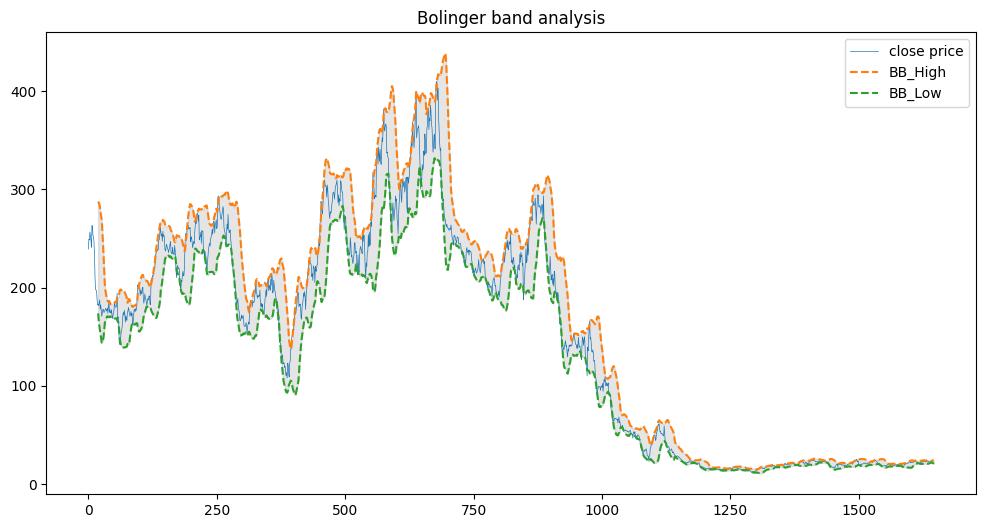

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(tsla_data['Close'],window=20,window_dev=2)

tsla_data['BB_High']=bb.bollinger_hband()
tsla_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(tsla_data['Close'],label='close price',linewidth=0.5)
plt.plot(tsla_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(tsla_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(tsla_data.index,tsla_data['BB_High'],
                 tsla_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()
plt.show()

1. It indicates the decreasing volatility , potentionall presceding the priod of significiant price movement
2. IF band is widenning : it increase it in the volatility the large swings
3. if it touches the uper bound : hten this ia a over bot situation so there maybe price correction so stock price will fall
4. If it touches the lowwer bound : then this is a oversold situation the price will correct and the price will rebound
5. RSI indicator : the rsi is a moment oscillator that measures the speed and change of price movement it ranges from 0 to 100  with value above 70  indicates over-bought condition and the price and value below 30 indicates over-sold condition


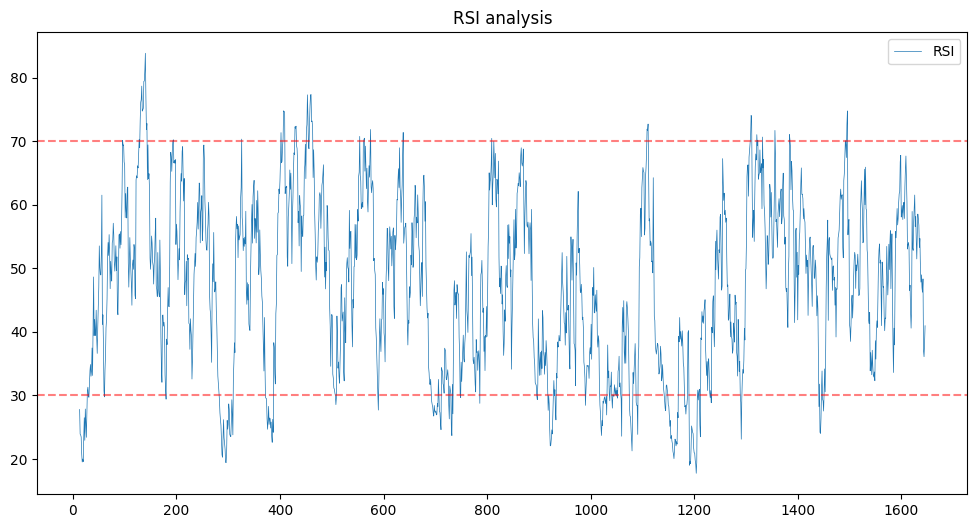

In [ ]:
# relative strength index
tsla_data['RSI'] = ta.momentum.rsi(tsla_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(tsla_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()


In [ ]:
tsla_data.tail()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
1642,1642,2018-01-08,TSLA,22.4273,22.4680,21.0333,21.0667,147555480,22.891335,22.429748,23.768466,22.014204,48.336314
1643,1643,2018-01-05,TSLA,21.1053,21.1493,20.8000,21.1080,68838660,22.836165,22.437788,23.977204,21.695126,37.002568
1644,1644,2018-01-04,TSLA,20.9747,21.2367,20.3787,20.8580,149194260,22.739065,22.439202,24.137625,21.340505,36.101978
1645,1645,2018-01-03,TSLA,21.1500,21.6833,21.0367,21.4000,66893295,22.632400,22.433736,24.167407,21.097393,38.273627
1646,1646,2018-01-02,TSLA,21.3687,21.4740,20.7333,20.8000,65188275,22.519800,22.426976,24.078509,20.961091,40.969089


In [ ]:
# save tsla_data to a new csv file
tsla_data.to_csv('tsla_data_new.csv')

ICICI = IBN
Infosys = IMFY
General Motors = GM
HSBC = HSBC


,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0
